In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("Amazon Sale Report.csv")

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [5]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [6]:
# Set index to index column
df = df.set_index('index')

In [7]:
# Remove the last two columns 
df.drop(columns="New",inplace=True)
df.drop(columns="PendingS",inplace=True)

In [8]:
# Firstly clean the Dataset
df['Amount'].isnull().sum()

7800

In [9]:

# Fill null values in 'Amount' column with 0 where 'Quantity' is 0
df.loc[(df['Courier Status'] == 'Cancelled') & (df['Qty'] == 0), 'Amount'] = 0


In [10]:
df['currency'].fillna('INR',inplace=True)

In [11]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                 1860
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

# 1. Sales Overview:
Understand the overall sales performance, trends, and patterns over time

##  Sales Data Summarization


In [12]:
Total_amount = df['Amount'].sum()
Total_order = df['Order ID'].nunique()

In [13]:
print(f"The Total amount of Amazon sales : {Total_amount}")
print(f"The Total Orders of Amazon  : {Total_order}")

The Total amount of Amazon sales : 78590170.24999997
The Total Orders of Amazon  : 120229


### Average Order Value (AOV)

In [14]:
AOV = Total_amount/Total_order

print("The Average order value : ",AOV )

The Average order value :  653.6706638997244


##  Time-based Sales Analysis (Monthly/Quarterly Trends)

In [15]:
# unique Date 
df['Date'].unique()

array(['04-30-22', '04-29-22', '04-28-22', '04-27-22', '04-26-22',
       '04-25-22', '04-24-22', '04-23-22', '04-22-22', '04-21-22',
       '04-20-22', '04-19-22', '04-18-22', '04-17-22', '04-16-22',
       '04-15-22', '04-14-22', '04-13-22', '04-12-2022', '04-11-2022',
       '04-10-2022', '04-09-2022', '04-08-2022', '04-07-2022',
       '04-06-2022', '04-05-2022', '04-04-2022', '04-03-2022',
       '04-02-2022', '04-01-2022', '03-31-22', '05-31-22', '05-30-22',
       '05-29-22', '05-28-22', '05-27-22', '05-26-22', '05-25-22',
       '05-24-22', '05-23-22', '05-22-22', '05-21-22', '05-20-22',
       '05-19-22', '05-18-22', '05-17-22', '05-16-22', '05-15-22',
       '05-14-22', '05-13-22', '05-12-2022', '05-11-2022', '05-10-2022',
       '05-09-2022', '05-08-2022', '05-07-2022', '05-06-2022',
       '05-05-2022', '05-04-2022', '05-03-2022', '05-02-2022',
       '05-01-2022', '06-29-22', '06-28-22', '06-27-22', '06-26-22',
       '06-25-22', '06-24-22', '06-23-22', '06-22-22', '06-21-

In [16]:
# Amazon dataset has (1 April 2022) to (30 july 2022)
# It has daywise sales data 


In [17]:
# conveting the DAte columns datatype into datetime

df['Date'] = pd.to_datetime(df['Date'])

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_8312\460753171.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128976 entries, 0 to 128974
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128976 non-null  object        
 1   Date                128976 non-null  datetime64[ns]
 2   Status              128976 non-null  object        
 3   Fulfilment          128976 non-null  object        
 4   Sales Channel       128976 non-null  object        
 5   ship-service-level  128976 non-null  object        
 6   Category            128976 non-null  object        
 7   Size                128976 non-null  object        
 8   Courier Status      128976 non-null  object        
 9   Qty                 128976 non-null  int64         
 10  currency            128976 non-null  object        
 11  Amount              127116 non-null  float64       
 12  ship-city           128941 non-null  object        
 13  ship-state          128941 non-nul

In [19]:
# Creating new columns that show only the Months 
df['Months'] = df['Date'].dt.to_period('M')

In [20]:
# Group data by Months
monthly_sales = df.groupby('Months').agg(Total_sale = ("Amount",'sum'),Total_order = ('Order ID','count')).reset_index()

In [21]:
monthly_sales

,Months,Total_sale,Total_order
0,2022-03,101683.85,171
1,2022-04,28836200.27,49068
2,2022-05,26226476.75,42040
3,2022-06,23425809.38,37697


In [22]:
# Group data by Date
Daily_sales = df.groupby('Date').agg(Total_sale  = ("Amount",'sum'),Total_order=("Order ID",'count')).reset_index()

In [23]:
Daily_sales.head()

,Date,Total_sale,Total_order
0,2022-03-31,101683.85,171
1,2022-04-01,865478.60,1470
2,2022-04-02,913101.53,1555
3,2022-04-03,1011763.38,1691
4,2022-04-04,882059.17,1465


In [24]:
# As we find the monthly and daily sales and orders we can easly apply different - different function like sum , max , min , mean , etc .
max_sale_monthly  = monthly_sales.loc[monthly_sales['Total_sale'].idxmax()]
print('Which month has Hight sales : ')
print(max_sale_monthly)
print("-------------------------------------------")
min_sale_monthly  = monthly_sales.loc[monthly_sales['Total_sale'].idxmin()]
print('Which month has lowest sales : ')
print(min_sale_monthly)
print("-------------------------------------------")
max_sale_daily  = Daily_sales.loc[Daily_sales['Total_sale'].idxmax()]
print('Which Day has highest sales : ')
print(max_sale_daily)
print("-------------------------------------------")
min_sale_daily  = Daily_sales.loc[Daily_sales['Total_sale'].idxmin()]
print('Which Day has lowest sales : ')
print(min_sale_daily)

Which month has Hight sales : 
Months             2022-04
Total_sale     28836200.27
Total_order          49068
Name: 1, dtype: object
-------------------------------------------
Which month has lowest sales : 
Months           2022-03
Total_sale     101683.85
Total_order          171
Name: 0, dtype: object
-------------------------------------------
Which Day has highest sales : 
Date           2022-05-04 00:00:00
Total_sale              1209364.17
Total_order                   2015
Name: 34, dtype: object
-------------------------------------------
Which Day has lowest sales : 
Date           2022-03-31 00:00:00
Total_sale               101683.85
Total_order                    171
Name: 0, dtype: object


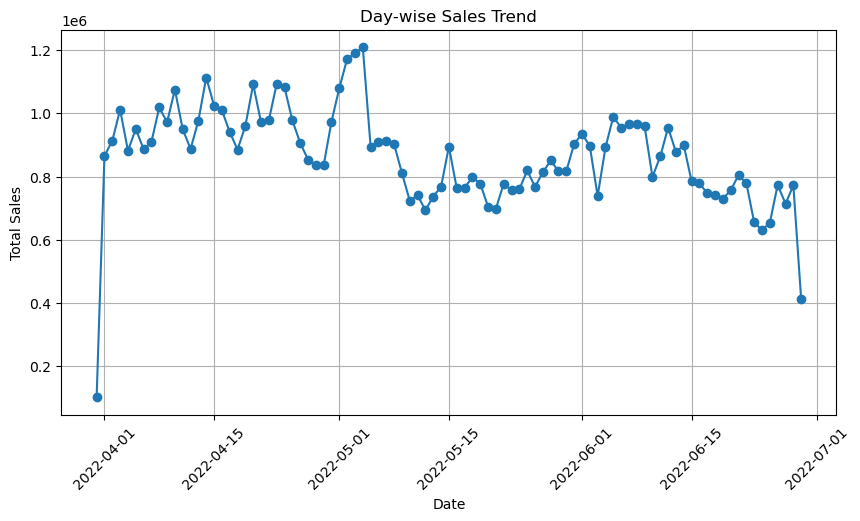

In [25]:
# Visualization
# Plotting the day-wise sales trend
plt.figure(figsize=(10,5))
plt.plot(Daily_sales['Date'],Daily_sales['Total_sale'], marker='o')
plt.title('Day-wise Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

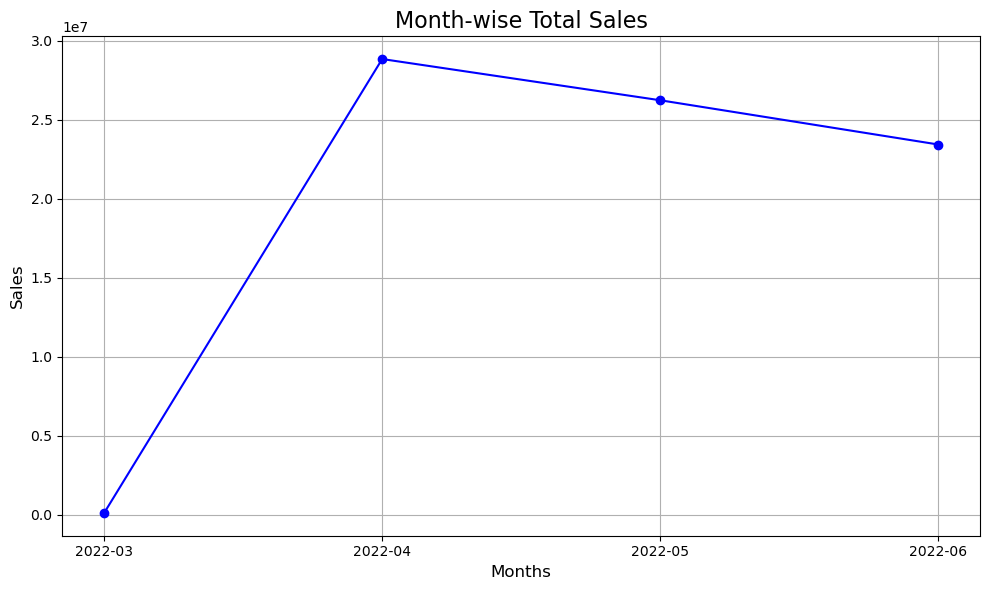

In [26]:
# Visualization
# Plotting the Month wise sales trend
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Months'].astype(str), monthly_sales['Total_sale'], marker='o', color='b', label='Total Sales')
plt.title('Month-wise Total Sales', fontsize=16)
plt.xlabel('Months',fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## Sales by Product Category

In [27]:
Category_sale = df.groupby('Category').agg(Total_sale = ('Amount','sum'),Total_orders=("Order ID",'count')).reset_index()

In [28]:
Category_sale

,Category,Total_sale,Total_orders
0,Blazzer,11215104.12,15500
1,Perfume,789419.66,1157
2,Shirt,21297770.08,49877
3,Shoes,124752.76,165
4,Socks,150757.50,440
5,T-shirt,39206756.65,50292
6,Trousers,5346286.30,10616
7,Wallet,458408.18,926
8,Watch,915.00,3


In [29]:
max_sales = Category_sale.loc[Category_sale['Total_sale'].idxmax()]

In [30]:
# As we find the Category sales and orders we can easly apply different - different function like sum , max , min , mean , etc .
max_sales_Category = Category_sale.loc[Category_sale['Total_sale'].idxmax()]
print('Which Category has Hight sales : ')
print(max_sales_Category)
print("-------------------------------------------")
min_sales_Category = Category_sale.loc[Category_sale['Total_sale'].idxmin()]
print('Which Category has lowest sales : ')
print(min_sales_Category)
print("-------------------------------------------")


Which Category has Hight sales : 
Category            T-shirt
Total_sale      39206756.65
Total_orders          50292
Name: 5, dtype: object
-------------------------------------------
Which Category has lowest sales : 
Category        Watch
Total_sale      915.0
Total_orders        3
Name: 8, dtype: object
-------------------------------------------


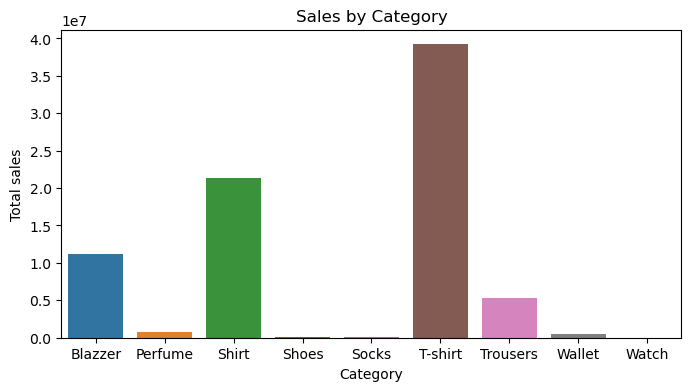

In [31]:
# Visulation 
plt.figure(figsize=(8,4))
sns.barplot(data=Category_sale,x='Category',y='Total_sale')
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel('Total sales')
plt.show()

# 2. Product Analysis: Analyze the distribution of product categories, sizes, and quantities sold to identify popular products. 


### Product Categories 

In [41]:
# Types of Product Categories
List_of_Product_Category  = df['Category'].unique().tolist()
print("----- Types of Product Categories into the Amazon dataset -----  ")
print(List_of_Product_Category)

----- Types of Product Categories into the Amazon dataset -----  
['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks', 'Shoes', 'Wallet', 'Watch']


In [39]:
# Product categories ka count nikalte hain
Product_categories_count = df["Category"].value_counts()
Product_categories_count

Category
T-shirt     50292
Shirt       49877
Blazzer     15500
Trousers    10616
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3
Name: count, dtype: int64

# Sizes Analysis

In [44]:
# size 
size_count = df['Size'].value_counts()
size_count

Size
M       22373
L       21807
XL      20549
XXL     17806
S       16776
3XL     14643
XS      11056
Free     2251
6XL       738
5XL       550
4XL       427
Name: count, dtype: int64

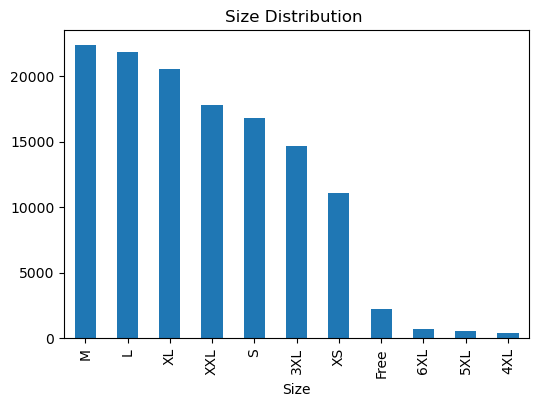

In [54]:
# Visualition
plt.figure(figsize=(6,4))
size_count.plot(kind = 'bar')
plt.title("Size Distribution ")
plt.show()

# Quantity Sold  Analysis

In [63]:

# Product category ke hisaab se quantity ka total nikalna

quantity_by_category = df.groupby('Category')['Qty'].sum()
quantity_by_category

Category
Blazzer     13943
Perfume      1051
Shirt       45044
Shoes         153
Socks         399
T-shirt     45292
Trousers     9898
Wallet        863
Watch           3
Name: Qty, dtype: int64

In [65]:
# Product Size ke hisaab se quantity ka total nikalna
quantity_by_size = df.groupby('Size')['Qty'].sum()
quantity_by_size

Size
3XL     13360
4XL       398
5XL       513
6XL       688
Free     2070
L       19706
M       20138
S       15041
XL      18636
XS       9850
XXL     16246
Name: Qty, dtype: int64

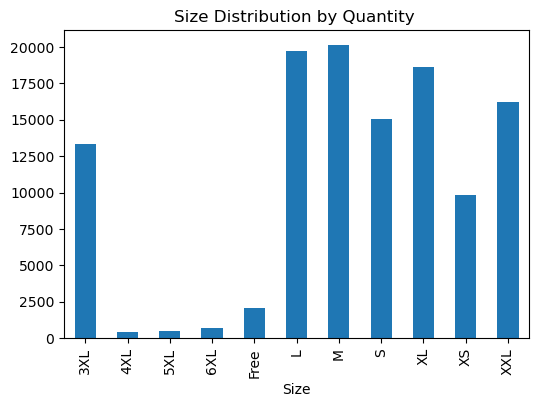

In [71]:
# Visualition
plt.figure(figsize=(6,4))
quantity_by_size.plot(kind = 'bar')
plt.title("Size Distribution by Quantity ")
plt.show()

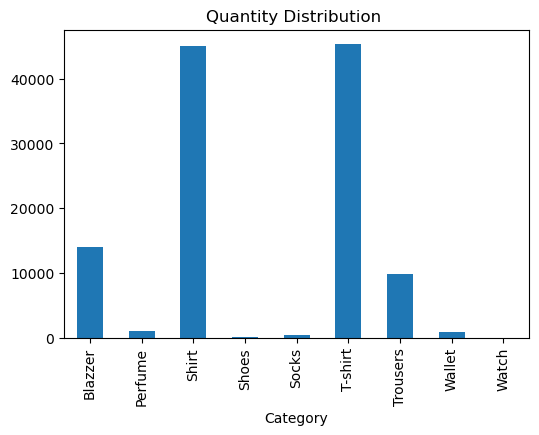

In [70]:
# Visualition
plt.figure(figsize=(6,4))
quantity_by_category.plot(kind = 'bar')
plt.title("Quantity Distribution ")
plt.show()

# 3. Fulfillment Analysis: Investigate the fulfillment methods used and their effectiveness in delivering orders

In [76]:
# Check the distribution of Fulfillment Methods
Fulfilment_count = df['Fulfilment'].value_counts()
Fulfilment_count

Fulfilment
Amazon      89713
Merchant    39263
Name: count, dtype: int64

In [78]:
# Grouping by Fulfillment Method and Status to get the count of each
Fulfilment_status = df.groupby(['Fulfilment','Status']).size().unstack(fill_value=0)
Fulfilment_status

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping
Fulfilment,,,,,,,,,,,,,
Amazon,11475,415,0,77815,0,0,0,0,0,0,0,0,8
Merchant,6859,243,281,0,1,28756,5,35,973,11,1954,145,0


In [80]:
Status_list=df['Status'].unique().tolist()
Status_list

['Cancelled',
 'Shipped - Delivered to Buyer',
 'Shipped',
 'Shipped - Returned to Seller',
 'Shipped - Rejected by Buyer',
 'Shipped - Lost in Transit',
 'Shipped - Out for Delivery',
 'Shipped - Returning to Seller',
 'Shipped - Picked Up',
 'Pending',
 'Pending - Waiting for Pick Up',
 'Shipped - Damaged',
 'Shipping']

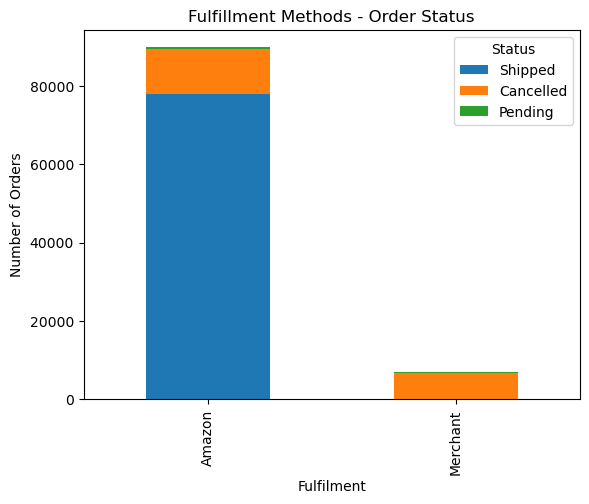

In [82]:
# Visualition
Fulfilment_status[['Shipped', 'Cancelled', 'Pending']].plot(kind='bar', stacked=True)
plt.title('Fulfillment Methods - Order Status')
plt.ylabel('Number of Orders')
plt.show()